## Linear Regression 
#### Multivariant Linear Regression, from scratch.

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`, `Stanley Dukor`, `Kelechi`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [1]:
# Libraries required for this practice 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

The data we will be using is a .txt file which contains a list of bedroom sizes, number of bedrooms and their corresponding price of the house.

The values on the first column contains the bedroom sizes, the values of the second column contains the number of bedrooms and values on the third column contains the corresponding price of the house, in Naira.

The goal of this exercise is to use linear regression and the optimization technique to generate a model that will predcit reasonable estimate of a house price when it is supplied the customers desired room size and number of rooms.

In [2]:
# Using pandas to view the data
data = pd.read_csv('data/ex1data2.txt', names=['size','bedroom','price'])
data.head() # this will show the first five data in the dataframe

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Lets convert values of the pandas dataframe into a numpy array
data = data.values

You can also convert the data in to a numpy array without needing to go through pandas. Use the code below

`data = np.loadtxt("ex1data1.txt", delimiter=',')`

In [4]:
data.shape

(47, 3)

We have 47 training examples and two independent variable `x` on the first and second column and one dependent variable `y` on the third column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `y` is the ground truth or output
- `x` is the input values
- `theta` is the weight or parameters that needs to learn


Beacuse we have three coefficient of `theta` `( x1, x2)`, we want to create a `97 x 2` matrix that contains the input values on the first column and second column.

Notice that unlike in the last class, we did not create a third column here that contains `ones` which are coefficients for the **bias** `ie (theta0)`. This is because we would still have to normalize the input data. and it makes no sense normalizing `ones`, because we want them to remain as `ones`.

In [5]:
x_data = np.c_[data[:,0], data[:,1]] 

In [6]:
# x_data

Similarly, we want to create a row vector with a dimension of `97 x 1` for all the output values in our dataset

In [7]:
y = np.c_[data[:,2]]
y.shape

(47, 1)

### Data Visualization

Text(0.5, 1.0, 'ROOM SIZE VS PRICE')

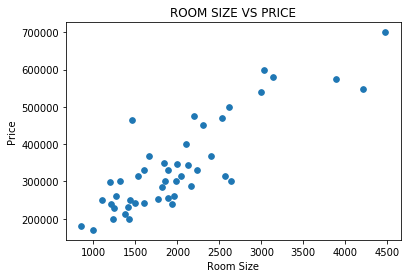

In [8]:
# Lets plot the data to see how they correlate.
plt.scatter(x_data[:,0], y, s=32, marker='o')
plt.xlabel("Room Size")
plt.ylabel("Price")
plt.title("ROOM SIZE VS PRICE")

Text(0.5, 1.0, 'NUMBER OF ROOMS VS PRICE')

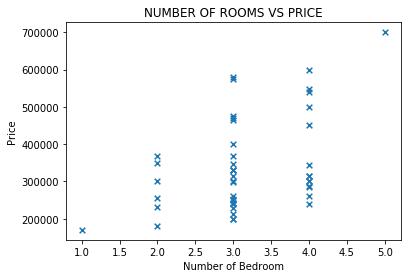

In [9]:
plt.scatter(x_data[:,1], y, s=32, marker='x')
plt.xlabel("Number of Bedroom")
plt.ylabel("Price")
plt.title("NUMBER OF ROOMS VS PRICE")

### Class Discussion

- What do you notice from the two plots?
- Do you thing a reasonable model can be created?

### Quick refresher

Lets plot a 3D representation on the data for you to observe

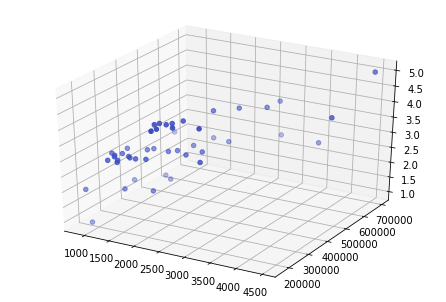

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

# our input data

x1 = x_data[:,0]
x2 = x_data[:,1]

c = (x2<=0)
fig = plt.figure()
ax = Axes3D(fig) 

ax.scatter3D(x1, y, x2, c=c, cmap="coolwarm" );

**Class Discussion:** What do you understand from the plot?? lol

## Feature Normalizing

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. ... Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. [wiki](https://en.wikipedia.org/wiki/Feature_scaling)
In this notebook, we will normalize our data using the formula below
![title](img/eqn1.gif)

In [12]:
def featureNorm(x_data):
    # save the feature data in another variable
    x_norm = x_data.copy()
    
    # Create a row vector of zeros, having the same number of rows as the input feature
    mean = np.mean(x_data, axis=0)
    standard_deviation = np.std(x_data, axis=0)
    print("... The mean and standard devation for the room sizes are: ", mean[0], " and ", standard_deviation[0] , "\n")
    print("... The mean and standard devation for the number of rooms are: ", mean[1], " and ", standard_deviation[1], "\n")
    
    # The formula
    x_norm = np.divide((x_data - mean),standard_deviation)
    print("... Input feature has been normalized", "\n")
    
    # Now, we can add the one vector that represent the coefficent of the bias that we discussed earlier
    x = np.concatenate((np.ones((x_data[:,0].size, 1)), x_norm), axis=1) 
    print("... A ones vector has been successfully concatenated to the input feature matrix", "\n")
    
    return x, mean, standard_deviation

In [13]:
x, mean, standard_deviation = featureNorm(x_data)

... The mean and standard devation for the room sizes are:  2000.6808510638298  and  786.2026187430467 

... The mean and standard devation for the number of rooms are:  3.1702127659574466  and  0.7528428090618782 

... Input feature has been normalized 

... A ones vector has been successfully concatenated to the input feature matrix 



In [14]:
# x

### Training 

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** In the last class, we used something like this `theta = [[0],[0],[0]]` to initialize the values of theta. Going forward, we will use the numpy function to initialize the values of theta, because we could have large number of theta values. ie `theta = np.zeros(3)`

In [15]:
def train(x, y):
    iteration = 1000
    # For this practice are initiallizing are theta with values of zero.
    theta = np.zeros((3, 1))
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)

        print("Running Gradient Descent. Current cost function is ", np.log(cost_function[i]))
        
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.


In [17]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return 0.5*np.sum(np.square(h - y))/m

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the learning rate

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [18]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

Now, lets pass in our data and train.

In [19]:
theta, cost_values = train(x, y)

Running Gradient Descent. Current cost function is  24.886790883635804
Running Gradient Descent. Current cost function is  24.86689279622735
Running Gradient Descent. Current cost function is  24.847018611391245
Running Gradient Descent. Current cost function is  24.827168522788295
Running Gradient Descent. Current cost function is  24.807342728925
Running Gradient Descent. Current cost function is  24.787541433199596
Running Gradient Descent. Current cost function is  24.767764843947987
Running Gradient Descent. Current cost function is  24.748013174489433
Running Gradient Descent. Current cost function is  24.72828664317207
Running Gradient Descent. Current cost function is  24.70858547341813
Running Gradient Descent. Current cost function is  24.688909893768905
Running Gradient Descent. Current cost function is  24.66926013792937
Running Gradient Descent. Current cost function is  24.64963644481242
Running Gradient Descent. Current cost function is  24.63003905858274
Running Gradien

Running Gradient Descent. Current cost function is  21.43820105972455
Running Gradient Descent. Current cost function is  21.43819772325398
Running Gradient Descent. Current cost function is  21.438194416278034
Running Gradient Descent. Current cost function is  21.43819113853377
Running Gradient Descent. Current cost function is  21.438187889760655
Running Gradient Descent. Current cost function is  21.43818466970051
Running Gradient Descent. Current cost function is  21.43818147809751
Running Gradient Descent. Current cost function is  21.438178314698128
Running Gradient Descent. Current cost function is  21.438175179251164
Running Gradient Descent. Current cost function is  21.438172071507676
Running Gradient Descent. Current cost function is  21.438168991220984
Running Gradient Descent. Current cost function is  21.43816593814664
Running Gradient Descent. Current cost function is  21.438162912042408
Running Gradient Descent. Current cost function is  21.438159912668254
Running Grad

In [20]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [340397.96353532 108742.65627238  -5873.22993383]


Lets visualize how or error reduced during the iteration. This is the power of gradient descent. 

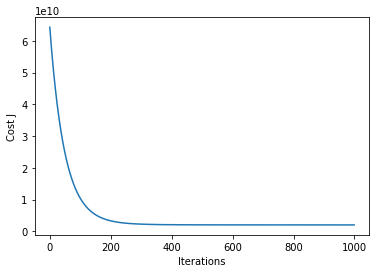

In [21]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Notice that at the `400th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

## Predict

Lets write a predict function that takes in the input features and produces an estimate price for the type of house desired

In [22]:
def predict(theta, mean, std):
    input_size = float(input("Input the size (square feet) of house you want: "))
    input_bedrooms = float(input("Input the number of bedrooms you desire: "))
    print("\nCalculating... ... ... ... ... ...\n")
    input_vec = np.array([[1, input_size, input_bedrooms]])
    
    input_norm = np.ones(input_vec.shape)
    input_norm.dtype = np.float
    
    input_norm[:, 1:] = np.divide((input_vec[:, 1:] - mean), std)
    
    price = input_norm @ theta
    print("For a house of size ", input_size, "sqft, with ", input_bedrooms, "rooms, \nThe price estimate is N", price[0][0])

In [23]:
predict(theta, mean, standard_deviation)

Input the size (square feet) of house you want: 8966
Input the number of bedrooms you desire: 4

Calculating... ... ... ... ... ...

For a house of size  8966.0 sqft, with  4.0 rooms, 
The price estimate is N 1297324.0815724498


### Learning Rates

But what ius the effect of varying learning rates in the optimization of our weights?
Below, we will plot the effect of different learning on the optimization of theta.

Study the code for the next 5 mins...

In [69]:
# Choose some alpha value
alphas = [1,0,0.1,0.01]

def update_weight_r(h, theta, x, alpha):
    m = x[:,0].size
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

def cost_r(x):
    J = []
    theta = [[0],[0],[0]]
    iteration = 10
    for i in alphas:
        alpha = i
        m = x[:,0].size
        J_alpha = []
        for i in range(iteration):
            h = x @ theta
            theta = update_weight_r(h, theta, x, alpha)
            cost = (1/2*m) * np.sum(np.square(h - y))
            J_alpha.append(cost)
        # reset theta to zero
        theta = [[0],[0],[0]]
        J.append(J_alpha)
    return J


Text(0.5, 1.0, 'lr= 0.01')

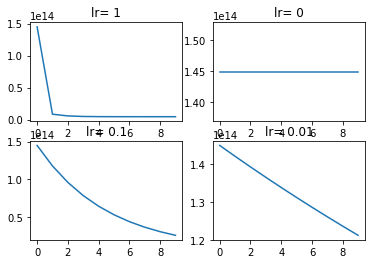

In [70]:
# Lets pass in the value of x into our function defined above 
cost_alpha = cost_r(x)

plt.figure()
plt.subplot(2,2,1)
plt.plot(cost_alpha[0])
plt.title('lr= 1')

plt.subplot(2,2,2)
plt.plot(cost_alpha[1])
plt.title('lr= 0')

plt.subplot(2,2,3)
plt.plot(cost_alpha[2])
plt.title('lr= 0.1')

plt.subplot(2,2,4)
plt.plot(cost_alpha[3])
plt.title('lr= 0.01')


**Class Discussion:** What did you notice in this plots

## Normal Equation (Analytical Method)

$$\theta = (X^TX)^{-1}X^T\vec{y}$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no \loop until convergence" like in gradient descent.

Complete the code in normaleqn.py to use the formula above to calcu- late $\theta$. Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term

In [22]:
# lets define the formula in a function
def normalEqn(X,y):
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

In [23]:
# Lets pass in our inout values the have not been normalized
x_non_norm = np.concatenate((np.ones((x_data[:,0].size, 1)), x_data), axis=1) 

theta_analytical = normalEqn(x_non_norm, y)

# Display normal equation's result
print ('Theta computed from the normal equations:')
print (' %s \n' % theta_analytical)

Theta computed from the normal equations:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]] 



In [24]:
#Predict
def predict_analytical(theta):
    input_size = float(input("Input the size (square feet) of house you want: "))
    input_bedrooms = float(input("Input the number of bedrooms you desire: "))
    print("\nCalculating... ... ... ... ... ...\n")
    input_vec = np.array([[1, input_size, input_bedrooms]])
    
    
    price = input_vec @ theta
    print("For a house of size ", input_size, "sqft, with ", input_bedrooms, "rooms, \nThe price estimate is N", price[0][0])

In [25]:
predict_analytical(theta_analytical)

Input the size (square feet) of house you want: 1650
Input the number of bedrooms you desire: 4

Calculating... ... ... ... ... ...

For a house of size  1650.0 sqft, with  4.0 rooms, 
The price estimate is N 284343.4452225697


### Assignment:

1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Explore the internet for an multivariant dataset and use this algorithim to train a linear regression model. Use `scikit-learn` too

Assignment is due for submission on `05/04/2019`.

Summission link will be posted on the `WhatsApp Class Group`